<div style="border:solid Chocolate 2px; padding: 40px">

Сергей привет, меня зовут Станислав, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это неудобно - дай знать, и мы перейдем на «вы».
Это учебный проект и здесь не стоит бояться делать ошибки, я хочу поделиться своим опытом и помочь тебе стать аналитиком данных.
Уже выполнена большая работа над проектом, давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> Так выделены самые важные замечания. Как только ты их исправишь проект будет принят. </div>

<div class="alert alert-warning">
⚠️  <b>Комментарий с небольшим замечанием или советом ревьюера:</b> Так выделены небольшие замечания или советы. 
</div>

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>



<div class="alert alert-warning">
⚠️  <b>Комментарий с небольшим замечанием или советом ревьюера:</b>

Для того, чтобы сразу понять, о чем проект, в начале лучше добавить:
    
- краткое описание проекта;

- описание данных;

- план работы;

- цель проекта;
    
- заголовок.

</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Привет, Станислав. Спасибо за приветственные слова! Добавил описание к проекту.</div>

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера в2:</b>

    
Отлично

# Сборный проект 2

**Описание проекта**

Заказчик этого исследования — большая телекоммуникационная компания, которая оказывает услуги на территории всего СНГ. Перед компанией стоит задача определить текущий уровень потребительской лояльности, или NPS (от англ. Net Promoter Score), среди клиентов из России. 


Чтобы определить уровень лояльности, клиентам задавали классический вопрос: «Оцените по шкале от 1 до 10 вероятность того, что вы порекомендуете компанию друзьям и знакомым».


Чтобы оценить результаты опроса, оценки обычно делят на три группы:
9-10 баллов — «cторонники» (англ. promoters);
7-8 баллов — «нейтралы» (англ. passives);
0-6 баллов — «критики» (англ. detractors).

Итоговое значение NPS рассчитывается по формуле: % «сторонников» - % «критиков».

Таким образом, значение этого показателя варьируется от -100% (когда все клиенты «критики») до 100% (когда все клиенты лояльны к сервису). Но это крайние случаи, которые редко встретишь на практике. 

Интерпретируя результаты NPS-опросов, следует также помнить, что само значение мало о чём говорит. Однако исследования показывают, что клиенты-сторонники полезны любому бизнесу. Они чаще других повторно совершают покупки, активнее тестируют обновления и приводят в сервис своих друзей и знакомых. Поэтому NPS остаётся одной из важнейших метрик бизнеса. 


**Цели и задачи проекта**

Цель проекта - визуализировать результаты опроса телекоммуникационной компании в виде дашборда.

Задачи проекта:

1. Полключиться к базе данных
2. Выгрузить данные с помощью SQL-запроса
3. Провести обработку данных и исследовательский анализ в Tableau
4. Составить подходящие визуализации 
5. Завершить анализ созданием дашборда и презентации

In [14]:
# импортируем библиотеки
import os
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

In [15]:
path_to_db_local = 'telecomm_csi.db'
path_to_db_platform = '/datasets/telecomm_csi.db'
path_to_db = None

if os.path.exists(path_to_db_local):
    path_to_db = path_to_db_local
elif os.path.exists(path_to_db_platform):
    path_to_db = path_to_db_platform
else:
    raise Exception('Файл с базой данных SQLite не найден!')

if path_to_db:
    engine = create_engine(f'sqlite:///{path_to_db}', echo=False)

In [16]:
query = """
SELECT 
    u.user_id,
    u.lt_day,
    CASE 
        WHEN u.lt_day <= 365 THEN 1
        ELSE 0
    END AS is_new,
    u.age,
    CASE 
        WHEN gender_segment = 1 THEN 'Female'
        WHEN gender_segment = 0 THEN 'Male'
        ELSE 'Unknown'
    END AS gender_segment,
    u.os_name,
    u.cpe_type_name,
    l.country,
    l.city,
    a.title AS age_segment,
    t.title AS traffic_segment,
    lt.title AS lifetime_segment,
    u.nps_score,
    CASE 
        WHEN u.nps_score >= 9 THEN 'promoter'
        WHEN u.nps_score >= 7 THEN 'passive'
        ELSE 'detractor'
    END AS nps_group
FROM user u
JOIN location l ON u.location_id = l.location_id
JOIN age_segment a ON u.age_gr_id = a.age_gr_id
JOIN traffic_segment t ON u.tr_gr_id = t.tr_gr_id
JOIN lifetime_segment lt ON u.lt_gr_id = lt.lt_gr_id;

"""

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Формирование признака пола     CASE 
        WHEN u.gender_segment = 1 THEN 'Female'
        ELSE 'Male'
    END AS gender_segment будет работать корректно в том случае, если в данных имеются только поля 0 и 1, необходимо удостовериться, что это именно так, потому что могут иметься пропуски в данных.
    
</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Переделал конструкцию на 
    CASE 
        WHEN gender_segment = 1 THEN 'Female'
        WHEN gender_segment = 0 THEN 'Male'
        ELSE 'Unknown'
    END AS gender_segment, таким образом все значения кроме 0 и 1 попадут в категорию Unknown</div>

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера в2:</b>

    
Отлично

In [17]:
df = pd.read_sql(query, engine)
df.head(3)

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,0,45.0,Female,ANDROID,SMARTPHONE,Россия,Уфа,05 45-54,04 1-5,08 36+,10,promoter
1,A001WF,2344,0,53.0,Male,ANDROID,SMARTPHONE,Россия,Киров,05 45-54,04 1-5,08 36+,10,promoter
2,A003Q7,467,0,57.0,Male,ANDROID,SMARTPHONE,Россия,Москва,06 55-64,08 20-25,06 13-24,10,promoter


In [18]:
# изучим датафрейм
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502493 entries, 0 to 502492
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           502493 non-null  object 
 1   lt_day            502493 non-null  int64  
 2   is_new            502493 non-null  int64  
 3   age               501939 non-null  float64
 4   gender_segment    502493 non-null  object 
 5   os_name           502493 non-null  object 
 6   cpe_type_name     502493 non-null  object 
 7   country           502493 non-null  object 
 8   city              502493 non-null  object 
 9   age_segment       502493 non-null  object 
 10  traffic_segment   502493 non-null  object 
 11  lifetime_segment  502493 non-null  object 
 12  nps_score         502493 non-null  int64  
 13  nps_group         502493 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 53.7+ MB


In [19]:
# изучим датафрейм
df.describe()

,lt_day,is_new,age,nps_score
count,502493.000000,502493.000000,501939.000000,502493.000000
mean,1868.841439,0.171346,39.621946,7.508562
std,1683.701762,0.376811,11.188249,3.020378
min,-21.000000,0.000000,10.000000,1.000000
25%,533.000000,0.000000,31.000000,5.000000
50%,1239.000000,0.000000,38.000000,9.000000
75%,3064.000000,0.000000,47.000000,10.000000
max,9162.000000,1.000000,89.000000,10.000000


В данных 14 колонок, 502493 строк. 

Типы данных: float64(1), int64(3), object(10)

Память: 53.7+ MB


<div class="alert alert-warning">
⚠️ <b>Комментарий с небольшим замечанием или советом ревьюера:</b> 


Здесь еще лучше вывести более полную статистику по датафрейму, применив describe() и info().
    
</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Добавил.</div>

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера в2:</b>

    
Отлично

In [20]:
file_path = 'filename.csv'

try:
    df.to_csv(file_path, index=False)
    print(f"File saved successfully to {file_path}")
except FileNotFoundError:
    print("File path is incorrect or directories do not exist.")
except PermissionError:
    print("Permission denied. Check your write permissions.")
except Exception as e:
    print(f"An error occurred: {e}")


File saved successfully to filename.csv


Ревьюер, добрый день! Ссылка на мой дашборд: https://public.tableau.com/views/NPSsurvey_17217470134910/sheet18?:language=en-GB&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера по Дашборду:</b>

    
Отличный анализ групп по пользователям, добавлены графики по основным категориям: полу/возрасту, городам, выведено соотношение новых и старых пользователей, добавлены все необходимые фильтры.
    
Здорово, что сделан анализ по группам.
    
Добавлен подробный анализ NPS по нескольким разрезам.
</div>


<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера по Дашборду:</b> 

Есть несколько замечаний, которые необходимо скорректировать:    


- доработай, пожалуйста, фильтр на странице "Кто наши клиенты?3", сейчас он не применятся к графиками
    
- доработай, пожалуйста, графики на странице "Кто наши клиенты?3", сейчас она по сути дублируют информацию, важнее для нашей задачи на левом графике сделать сортировку по уровню NPS
    
- добавь, пожалуйста, анализ уровня лояльности - NPS по: типу пользователя и по времени пользования сервисом (lifetime)
    

</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b>
    
    1. Переделал фильтры на странице "Кто наши клиенты?3"
    2. Переделал сортировку по уровеню NPS. Не совсем согласен с таким решением, ведь доля пользователей в городах с высоким NPS много меньше, чем в крупных городах. Во всплывающей подсказке есть информация об общем количестве опрошенных, их доле от общего числа и уровень NPS. Должно быть понятно что опираться только на высокий уровень не стоит. 
    3. Добавил анализ уровня лояльности по времени пользования сервисом (по годам). Сортировал по уровню лояльности, чтобы наглядно было видно в какой год "жизни" пользователь наиболее лоялен. Если что исправь меня. Не понял что такое тип пользователя) Можешь подробнее описать что нужно сделать?

</div>

Ссылка на переделанных дашборд: https://public.tableau.com/views/NPSsurvey_v2/sheet21?:language=en-GB&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера по Дашборду в2:</b>

    
Отлично, спасибо за проработку дашборда

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера по Дашборду в2:</b> 

   


- ниже приложил принтскрин по графику "Кто наши клиенты?3", как я вижу выделенный мной фильтр не применяется к графикам, так же tooltips необходимо доработать
    
- тип пользователя - новый или старый пользователь

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Доработал дашборд: добавил фильтр по топ уровню лояльности, тултипы тоже исправил, добавил новый дашборд с анализом типов пользователей. </div>

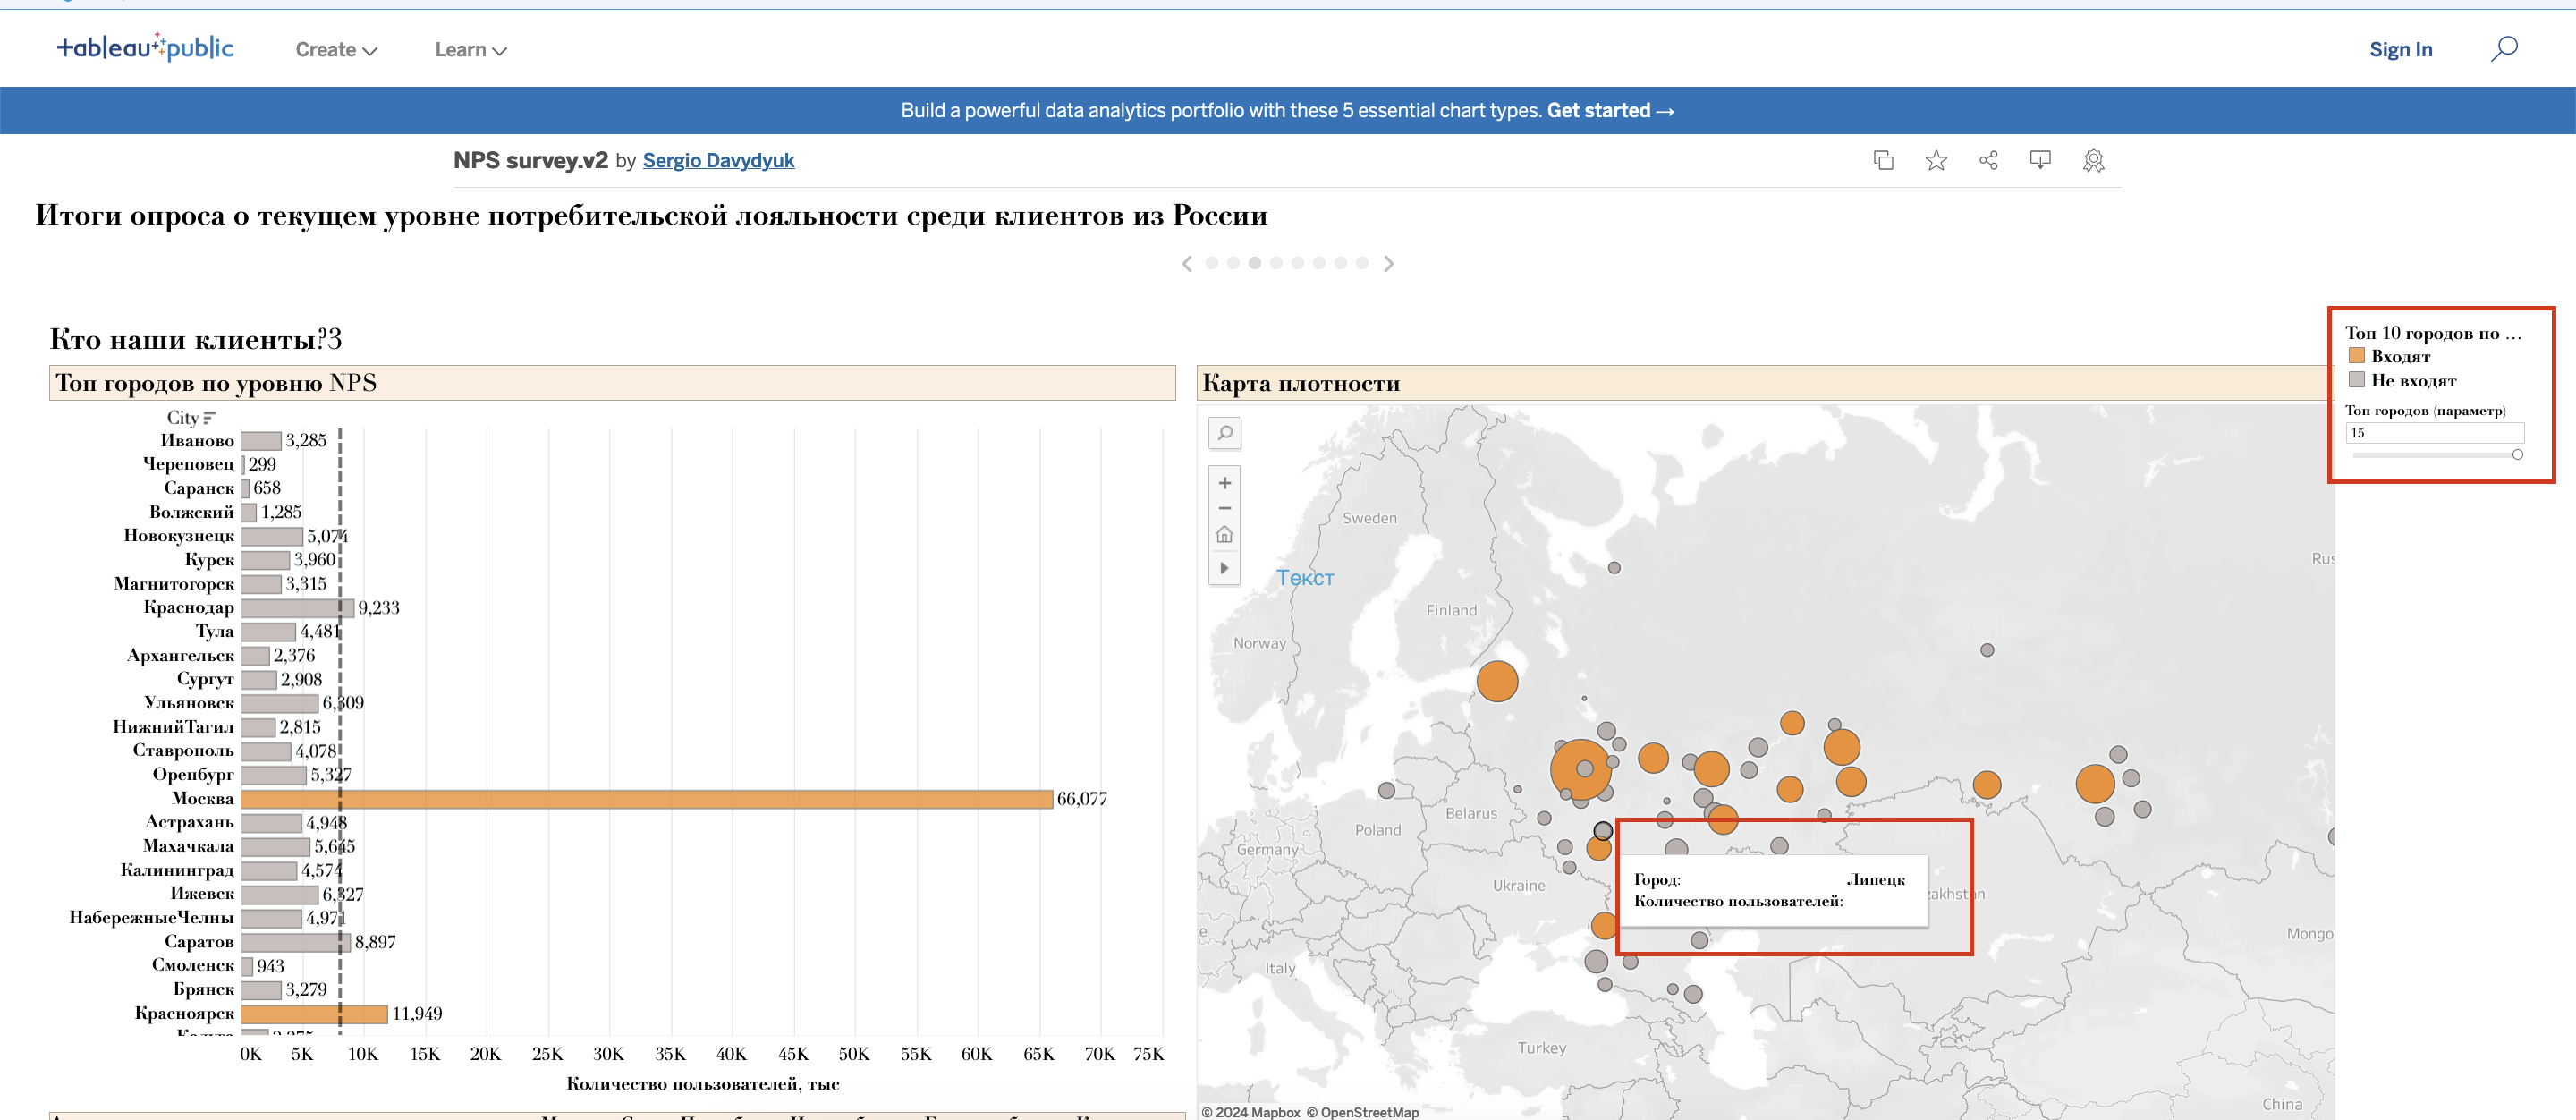

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо! Исправил</div>

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера по Дашборду в3:</b>

    
Здорово, твоей дашборд стал лучше, отлично!

Ссылка на новую (третью) версию дашборда: https://public.tableau.com/views/NPSsurvey_v3/sheet24?:language=en-GB&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link